<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project2 - Bike Sharing</h3>
</div>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load and Prepare Data

In [2]:
df=pd.read_csv(r'C:\Users\Sony\Desktop\train.csv')
df2=pd.read_csv(r'C:\Users\Sony\Desktop\test.csv')

## EDA

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [6]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
df.groupby('season').count()

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,,,,,,,,,,,
1,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686
2,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
3,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733,2733
4,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734,2734


## Data Preprocessing

In [9]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

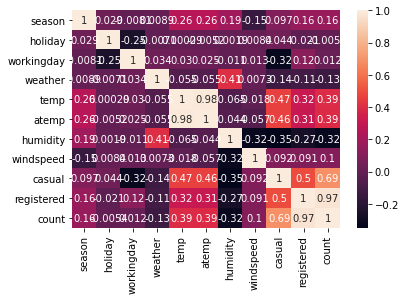

In [10]:
my_correlation = df.corr()
sns.heatmap(my_correlation,annot=True)

In [11]:
my_correlation

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


## Strorytelling - Visualization

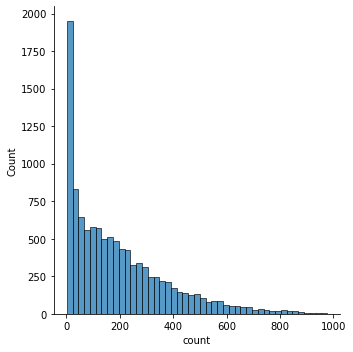

In [38]:
sns.displot(df, x="count")

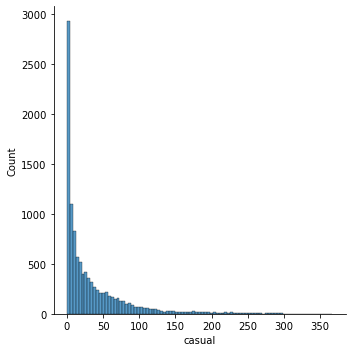

In [39]:
sns.displot(df, x="casual")

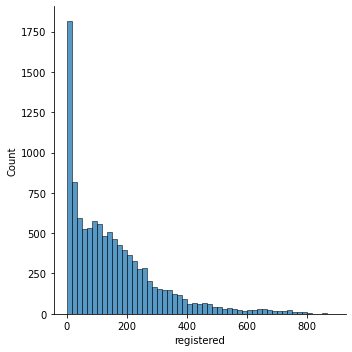

In [42]:
sns.displot(df, x="registered")

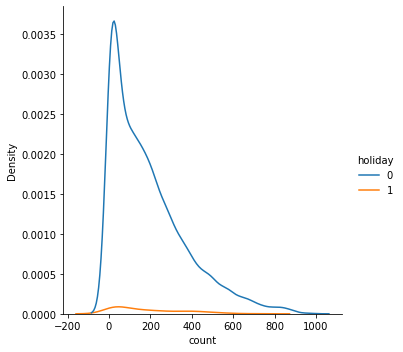

In [43]:
sns.displot(df, x="count", hue='holiday',kind="kde")

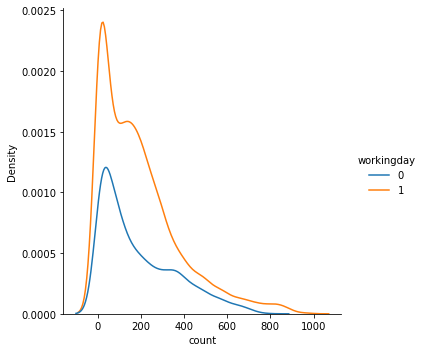

In [44]:
sns.displot(df, x="count", hue='workingday',kind="kde")

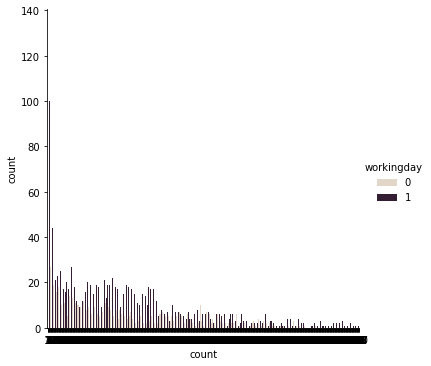

In [45]:
sns.catplot(x="count",hue='workingday', kind="count",palette="ch:.25", data=df)

In [ ]:
#ba tavajoh b nemoodare bala motevajeh shodim niaz b StandardScaler darim


## Train your model (Regression)

In [33]:
x = df[['registered']]
y = df[['count']]

In [34]:
x

,registered
0,13
1,32
2,27
3,10
4,1
...,...
10881,329
10882,231
10883,164
10884,117


In [35]:
y

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [45]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=20)

In [49]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [50]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [51]:
pred=regressor.predict(x_test)

In [52]:
pred[13]

array([403.85879599])

<AxesSubplot:ylabel='Count'>

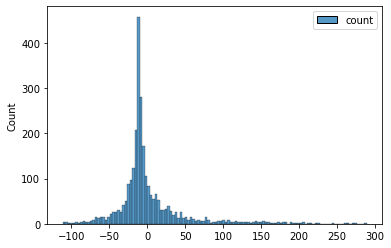

In [53]:
sns.histplot(y_test-pred)

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 27.315812253831457
Mean Squared Error: 1988.9377425410303
Root Mean Squared Error: 44.5975082548457


In [90]:
x = df.iloc[:,1:-1]
y = df['count']


In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 4)

In [92]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [93]:
mlr.intercept_

2.842170943040401e-14

In [94]:
mlr.coef_

array([ 2.65333763e-15,  3.35953487e-13, -5.34186410e-14,  2.17870969e-14,
        3.63598041e-15, -4.16333634e-15,  1.08246745e-15,  2.77555756e-17,
        1.00000000e+00,  1.00000000e+00])

In [95]:
y_pred = mlr.predict(x_train)

In [96]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 1.0
MAE: 8.126916686695771e-14
MSE: 1.26449439830644e-26
RMSE: 1.1244973980878924e-13


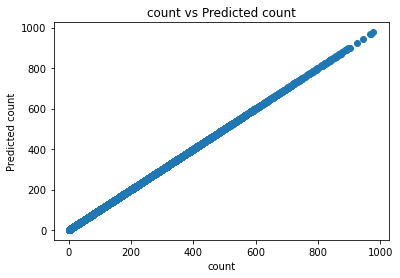

In [98]:
plt.scatter(y_train, y_pred)
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("count vs Predicted count")
plt.show()

In [99]:
#estefade az hame feature ha baeses pchidegie model va overfitting shode

In [151]:
x = df.iloc[:,5:7]
y = df['count']

In [152]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 4)

In [154]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [155]:
y_pred = mlr.predict(x_train)

In [156]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.15561463410463883
MAE: 126.1842213300683
MSE: 27538.64633410339
RMSE: 165.9477216900051


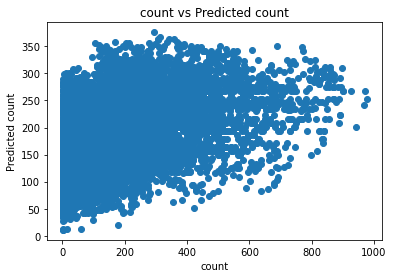

In [157]:
plt.scatter(y_train, y_pred)
plt.xlabel("count")
plt.ylabel("Predicted count")
plt.title("count vs Predicted count")
plt.show()

In [158]:
#moshkele overfitting hal shod vali model monaseb nis

In [168]:
x=df.drop(['workingday','datetime'],axis=1)
y=df['workingday']

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

C:\Users\Sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

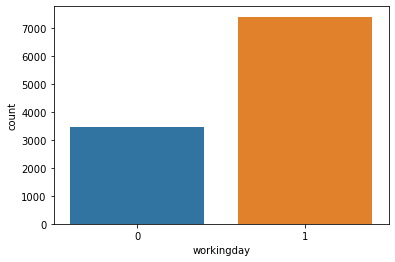

In [170]:
sns.countplot(y)

In [171]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [172]:
y_pred = knn.predict(x_test)

In [174]:
knn.score(x_train, y_train)

0.8519108280254777

In [175]:
knn.score(x_test, y_test)

0.769287288758266

In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.54      0.60       888
           1       0.80      0.88      0.84      1834

    accuracy                           0.77      2722
   macro avg       0.74      0.71      0.72      2722
weighted avg       0.76      0.77      0.76      2722



In [266]:
x = df.iloc[:,1:-3]
y = df['count']
x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,0,1,9.84,14.395,81,0.0000
1,1,0,0,1,9.02,13.635,80,0.0000
2,1,0,0,1,9.02,13.635,80,0.0000
3,1,0,0,1,9.84,14.395,75,0.0000
4,1,0,0,1,9.84,14.395,75,0.0000
...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027
10882,4,0,1,1,14.76,17.425,57,15.0013
10883,4,0,1,1,13.94,15.910,61,15.0013
10884,4,0,1,1,13.94,17.425,61,6.0032


In [267]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [268]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

In [269]:
y_pred=regressor.predict([[4,0,1,1,13.12,16.665,66,8.9981]])
y_pred

array([54.])

In [270]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators =50, random_state = 0)
regressor.fit(x,y)

RandomForestRegressor(n_estimators=50, random_state=0)

In [271]:
y_pred=regressor.predict([[4,0,1,1,15.6,19.7,50,26]])
y_pred

array([385.17666667])

In [272]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators =10, random_state = 0)
regressor.fit(x,y)

RandomForestRegressor(n_estimators=10, random_state=0)

In [273]:
y_pred=regressor.predict([[4,0,1,1,13.12,16.665,66,8.9981]])
y_pred

array([56.16666667])

## Test Result

In [274]:
df2.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [275]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [276]:
xt=df2.iloc[:,1:]
xt

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,1,1,10.66,11.365,56,26.0027
1,1,0,1,1,10.66,13.635,56,0.0000
2,1,0,1,1,10.66,13.635,56,0.0000
3,1,0,1,1,10.66,12.880,56,11.0014
4,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014
6489,1,0,1,2,10.66,12.880,60,11.0014
6490,1,0,1,1,10.66,12.880,60,11.0014
6491,1,0,1,1,10.66,13.635,56,8.9981


In [287]:
y_pred=regressor.predict(xt)
y_pred

[array([157.94      ,  75.9       ,  75.9       , ...,  82.        ,
         82.33333333,  18.        ])]

In [286]:
type(y_pred)

numpy.ndarray

In [289]:
y_pred=pd.DataFrame(data=y_pred)
y_pred

,0
0,157.940000
1,75.900000
2,75.900000
3,81.033333
4,81.033333
...,...
6488,135.250000
6489,135.250000
6490,82.000000
6491,82.333333


In [279]:
df3=pd.read_csv(r'C:\Users\Sony\Desktop\sampleSubmission.csv')

In [298]:
df3

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [307]:
df3.insert(2,'counts',y_pred,True)
df3.drop(['count'],axis=1)
df3

,datetime,count,counts,counts,counts,counts
0,2011-01-20 00:00:00,0,157.940000,157.940000,157.940000,157.940000
1,2011-01-20 01:00:00,0,75.900000,75.900000,75.900000,75.900000
2,2011-01-20 02:00:00,0,75.900000,75.900000,75.900000,75.900000
3,2011-01-20 03:00:00,0,81.033333,81.033333,81.033333,81.033333
4,2011-01-20 04:00:00,0,81.033333,81.033333,81.033333,81.033333
...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,0,135.250000,135.250000,135.250000,135.250000
6489,2012-12-31 20:00:00,0,135.250000,135.250000,135.250000,135.250000
6490,2012-12-31 21:00:00,0,82.000000,82.000000,82.000000,82.000000
6491,2012-12-31 22:00:00,0,82.333333,82.333333,82.333333,82.333333


## Send us the Result (On Telegram or Soheil.tehranipoor@yahoo.com)